In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Asus\AppData\Local\Temp\ipykernel_12084\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
PATH_TO_DATA = "hashspeed.csv"
AMOUNT = [100]

In [43]:
logs = pd.read_csv(PATH_TO_DATA)
logs

,Function,Duration,Amount
0,SortedArray,6638,10000
1,searchSameSort,3277,10000
2,searchRandomSort,6222,20000
3,AVLTreeBuild,8519,10000
4,searchSameAVL,3768,10000
...,...,...,...
116,removeSameAVL,624597,1000000
117,HashMapBuild,381817,1000000
118,searchSameHash,381113,1000000
119,searchRandomHash,636490,2000000


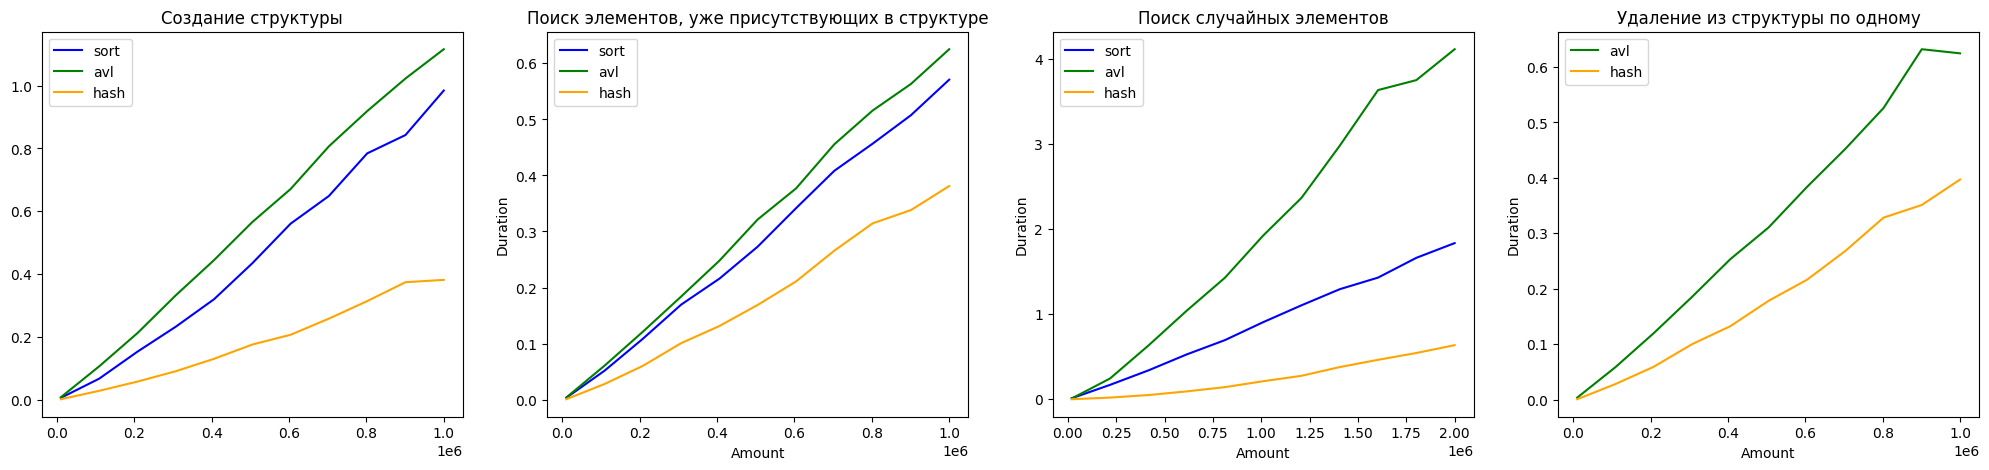

In [45]:
graphs = 4

plt.figure(figsize=(25, 5))
plt.subplot(1, graphs, 1)
plt.title("Создание структуры")
search_filtered = logs[logs.Function.isin(["SortedArray", "AVLTreeBuild", "HashMapBuild"])]
sort_search = search_filtered[search_filtered["Function"] == "SortedArray"]["Duration"]
avl_search = search_filtered[search_filtered["Function"] == "AVLTreeBuild"]["Duration"]
hash_search = search_filtered[search_filtered["Function"] == "HashMapBuild"]["Duration"]
plt.plot(search_filtered[search_filtered["Function"] == "SortedArray"]["Amount"], sort_search / 1e6, label="sort", color="blue")
plt.plot(search_filtered[search_filtered["Function"] == "AVLTreeBuild"]["Amount"], avl_search / 1e6, label="avl", color="green")
plt.plot(search_filtered[search_filtered["Function"] == "HashMapBuild"]["Amount"], hash_search / 1e6, label="hash", color="orange")
plt.legend()

plt.subplot(1, graphs, 2)
plt.title("Поиск элементов, уже присутствующих в структуре")
plt.xlabel("Amount")
plt.ylabel("Duration")
search_filtered = logs[logs.Function.isin(["searchSameSort", "searchSameHash", "searchSameAVL"])]
sort_search = search_filtered[search_filtered["Function"] == "searchSameSort"]["Duration"] # / search_filtered[search_filtered["Function"] == "searchSameSort"]["Amount"] 
avl_search = search_filtered[search_filtered["Function"] == "searchSameAVL"]["Duration"] #/ search_filtered[search_filtered["Function"] == "searchSameAVL"]["Amount"]
hash_search = search_filtered[search_filtered["Function"] == "searchSameHash"]["Duration"]# / search_filtered[search_filtered["Function"] == "searchSameHash"]["Amount"]
plt.plot(search_filtered[search_filtered["Function"] == "searchSameSort"]["Amount"], sort_search / 1e6, label="sort", color="blue")
plt.plot(search_filtered[search_filtered["Function"] == "searchSameAVL"]["Amount"], avl_search / 1e6, label="avl", color="green")
plt.plot(search_filtered[search_filtered["Function"] == "searchSameHash"]["Amount"], hash_search / 1e6, label="hash", color="orange")
plt.legend()

plt.subplot(1, graphs, 3)
plt.title("Поиск случайных элементов")
plt.xlabel("Amount")
plt.ylabel("Duration")
search_filtered = logs[logs.Function.isin(["searchRandomSort", "searchRandomHash", "searchRandomAVL"])]
sort_search = search_filtered[search_filtered["Function"] == "searchRandomSort"]["Duration"]
avl_search = search_filtered[search_filtered["Function"] == "searchRandomAVL"]["Duration"]
hash_search = search_filtered[search_filtered["Function"] == "searchRandomHash"]["Duration"]
plt.plot(search_filtered[search_filtered["Function"] == "searchRandomSort"]["Amount"], 2*sort_search / 1e6, label="sort", color="blue")
plt.plot(search_filtered[search_filtered["Function"] == "searchRandomAVL"]["Amount"], avl_search / 1e6, label="avl", color="green")
plt.plot(search_filtered[search_filtered["Function"] == "searchRandomHash"]["Amount"], hash_search / 1e6, label="hash", color="orange")
plt.legend()

plt.subplot(1, graphs, 4)
plt.title("Удаление из структуры по одному")
plt.xlabel("Amount")
plt.ylabel("Duration")
search_filtered = logs[logs.Function.isin(["removeSameAVL", "removeSameHash"])]
avl_search = search_filtered[search_filtered["Function"] == "removeSameAVL"]["Duration"]
hash_search = search_filtered[search_filtered["Function"] == "removeSameHash"]["Duration"]
plt.plot(search_filtered[search_filtered["Function"] == "removeSameAVL"]["Amount"], avl_search/1e6, label="avl", color="green")
plt.plot(search_filtered[search_filtered["Function"] == "removeSameHash"]["Amount"], hash_search/1e6, label="hash", color="orange")
plt.legend()

# plt.subplot(1, 5, 5)
# plt.title("Clear data structure")
# plt.xlabel("Amount")
# plt.ylabel("Duration")
# search_filtered = logs[logs.Function.isin(["SortedArrayClear", "AVLTreeClear", "HashMapClear"])]
# sort_search = search_filtered[search_filtered["Function"] == "SortedArrayClear"]["Duration"]
# avl_search = search_filtered[search_filtered["Function"] == "AVLTreeClear"]["Duration"]
# hash_search = search_filtered[search_filtered["Function"] == "HashMapClear"]["Duration"]
# plt.plot(search_filtered[search_filtered["Function"] == "SortedArrayClear"]["Amount"], sort_search/1e6, label="sort", color="blue")
# plt.plot(search_filtered[search_filtered["Function"] == "AVLTreeClear"]["Amount"], avl_search/1e6, label="avl", color="green")
# plt.plot(search_filtered[search_filtered["Function"] == "HashMapClear"]["Amount"], hash_search/1e6, label="hash", color="orange")
# plt.legend()

plt.savefig(f'images/result.png')